# Multi Armed Bandits and Reinforcement Learning
* Notebook by Adam Lang
* Date: 2/7/2025

# What is Multi Armed Bandit Algorithm?
* Multi-armed bandits are a class of explore-exploit algorithms that are used to make decisions under uncertainty.
* To help conceptually understand what we mean by an “explore-exploit algorithm,” it is best to consider the following problem setting, from which multi-armed bandits received their name.

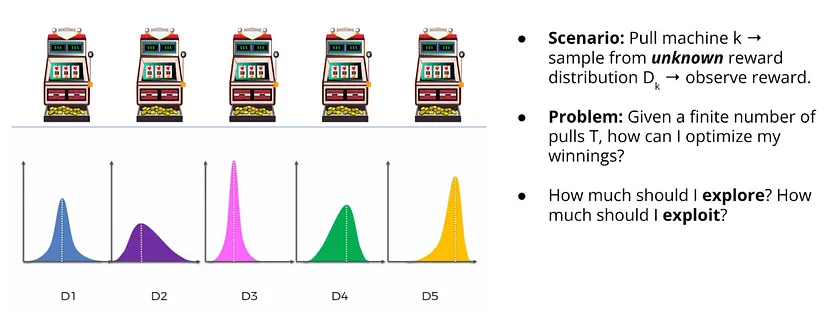



* Definition
  * The multi-armed bandit problem is a classic reinforcement learning scenario where an agent must choose between multiple actions (arms) to maximize cumulative reward over time.

* Exploration vs. Exploitation
  * The key challenge is balancing exploration (trying different arms to gather information) with exploitation (selecting the arm that seems best based on current knowledge).

* Uncertainty
  * Each arm has an unknown probability distribution of rewards, and the agent must learn these distributions through repeated trials.

* Goal of the algorithm
  * The objective is to minimize regret, which is the difference between the reward obtained by the agent's strategy and the reward that could have been obtained by always choosing the best arm.

* Algorithms
  * Various strategies exist to solve this problem, including ε-greedy, Upper Confidence Bound (UCB), Thompson Sampling, and contextual bandits, each with different approaches to balancing exploration and exploitation.

# Real World Explanation of Multi-Armed Bandit
1. Origin
  * This originated with Casino slot machines.
  * In any casino there are any number of machines, but not infinite.
  * Each slot machine has an arm.
  * Each machine has a different payout rate with different probability.
    * 90% of time machine 1 gives $10
    * 10% of time machine 2 gives $20
    * ….etc….

2. Problem
  * You dont have an infinite number of times/chances to pull the arms.
  * Without knowing the pay rates and the probabililty, how do you maximize your slot machine pulls to maximize your payout in dollars?


3 Real World Applications
  * Most common is when you are A/B testing multiple features in a system or application and you are not sure which feature is most important, how do you *actually* know?
  * Personalization is a common use case for this (e.g. reocmmendation systems, e-commerce)
  * Online learning system with reinforcement learning is another application.
    * An Agent adapts in real-time to each unique situation — it is NOT biased, it is personal to the user's interactions.


# Implementation

In [15]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [31]:
## function to plot agent history
def plot_history(history):
  rewards = history["rewards"]
  cum_rewards = history["cum_rewards"]
  chosen_arms = history["arms"]

  ## set plotting parameters
  fig = plt.figure(figsize=[30,8])

  ax2 = fig.add_subplot(121)
  ax2.plot(cum_rewards, label="avg rewards")
  ax2.set_title("Cumulative Rewards")

  ax3 = fig.add_subplot(122)
  ax3.bar([i for i in range(len(chosen_arms))], chosen_arms, label="chosen arms")
  ax3.set_title("Chosen Actions")

## Create an Environment for the Probability Payout
* `reward_probs` - list of probabilities of each arm
* `rewards` - list of "rewards" given

In [17]:
class Env(object):

  def __init__(self, reward_probs, rewards):
    if len(reward_probs) != len(rewards):
      raise Exception(f"Size of reward probs: {len(reward_probs)} does not match size of rewards: {len(rewards)}")

    self.reward_probs = reward_probs
    self.rewards = rewards
    self.k_arms = len(rewards) #num of options available to agent

  def choose_arm(self, arm):
    ## set parameters
    if arm < 0 or arm > self.k_arms:
      raise Exception(f"arm must be a value between 0 and {self.k_arms -1}")

    return self.rewards[arm] if np.random.random() < self.reward_probs[arm] else 0.0

## Example

In [18]:
## example

## 1. setup environment -- probabilities and reward amount
environment = Env(reward_probs=[0.01, 1.0, 0.75, 0.99, 0.65, 1.0], rewards=[95.0, 0.0, 25.5, 10.05, 5.45, 2.50])

## 2. print results
print(f"Reward Probabilities\t\t: {environment.reward_probs}")
print(f"Rewards \t\t: {environment.rewards}")

Reward Probabilities		: [0.01, 1.0, 0.75, 0.99, 0.65, 1.0]
Rewards 		: [95.0, 0.0, 25.5, 10.05, 5.45, 2.5]


Summary
* The first arm has a probability of 0.01 for a 95 reward.
* The 2nd arm is always 0 -- usually.
* The 3rd arm is 75% probability it will give you 25.5 reward.
* The 4th arm is a 99% probability it will give you 10.05 reward
* The 5th arm has a 65% probability of a reward of 5.45.
* The final arm has a 100% probability of a reward of 2.5.

In [19]:
## choose 2nd arm which has 100% chance of 0 reward
[environment.choose_arm(1) for _ in range(10)]

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

Summary
* So if we sample or pool the 2nd arm we always get the same.

In [20]:
## choose 1st arm which has 0.01 chance of 95 reward
[environment.choose_arm(0) for _ in range(10)]

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

Summary
* It is very difficult to get this reward, I was able to get it by sampling 5 times and you can see it is there but the rest of the probabilities are the same 0.01.

In [21]:
## lets test the final arm with 100% probablity of 2.5
[environment.choose_arm(5) for _ in range(10)]

[2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5]

Summary
* Obviously this works because the probability or weight is always 100%.

## Random Agent
* Creating a random agent

In [23]:
class RandomAgent(object):

  def __init__(self, env, max_iterations=2000):
    self.env = env
    self.iterations = max_iterations

  # 1. function to let agent interact with environment
  def act(self):
    arm_counts = np.zeros(self.env.k_arms)
    rewards = []
    cum_rewards = []

    ## loop through and randomly choose an arm and reward
    for i in range(1, self.iterations + 1):
      arm = np.random.choice(self.env.k_arms) # random choice out of num of arms available
      reward = self.env.choose_arm(arm)

      arm_counts[arm] += 1
      rewards.append(reward)
      cum_rewards.append(sum(rewards)/ len(rewards))

    return {"arms": arm_counts, "rewards": rewards, "cum_rewards": cum_rewards}

## Random Agent

In [33]:
random_agent = RandomAgent(env=environment, max_iterations=2000)
ra_history = random_agent.act()
print(f"TOTAL REWARD: {sum(ra_history['rewards']):.2f}")

TOTAL REWARD: 11295.60


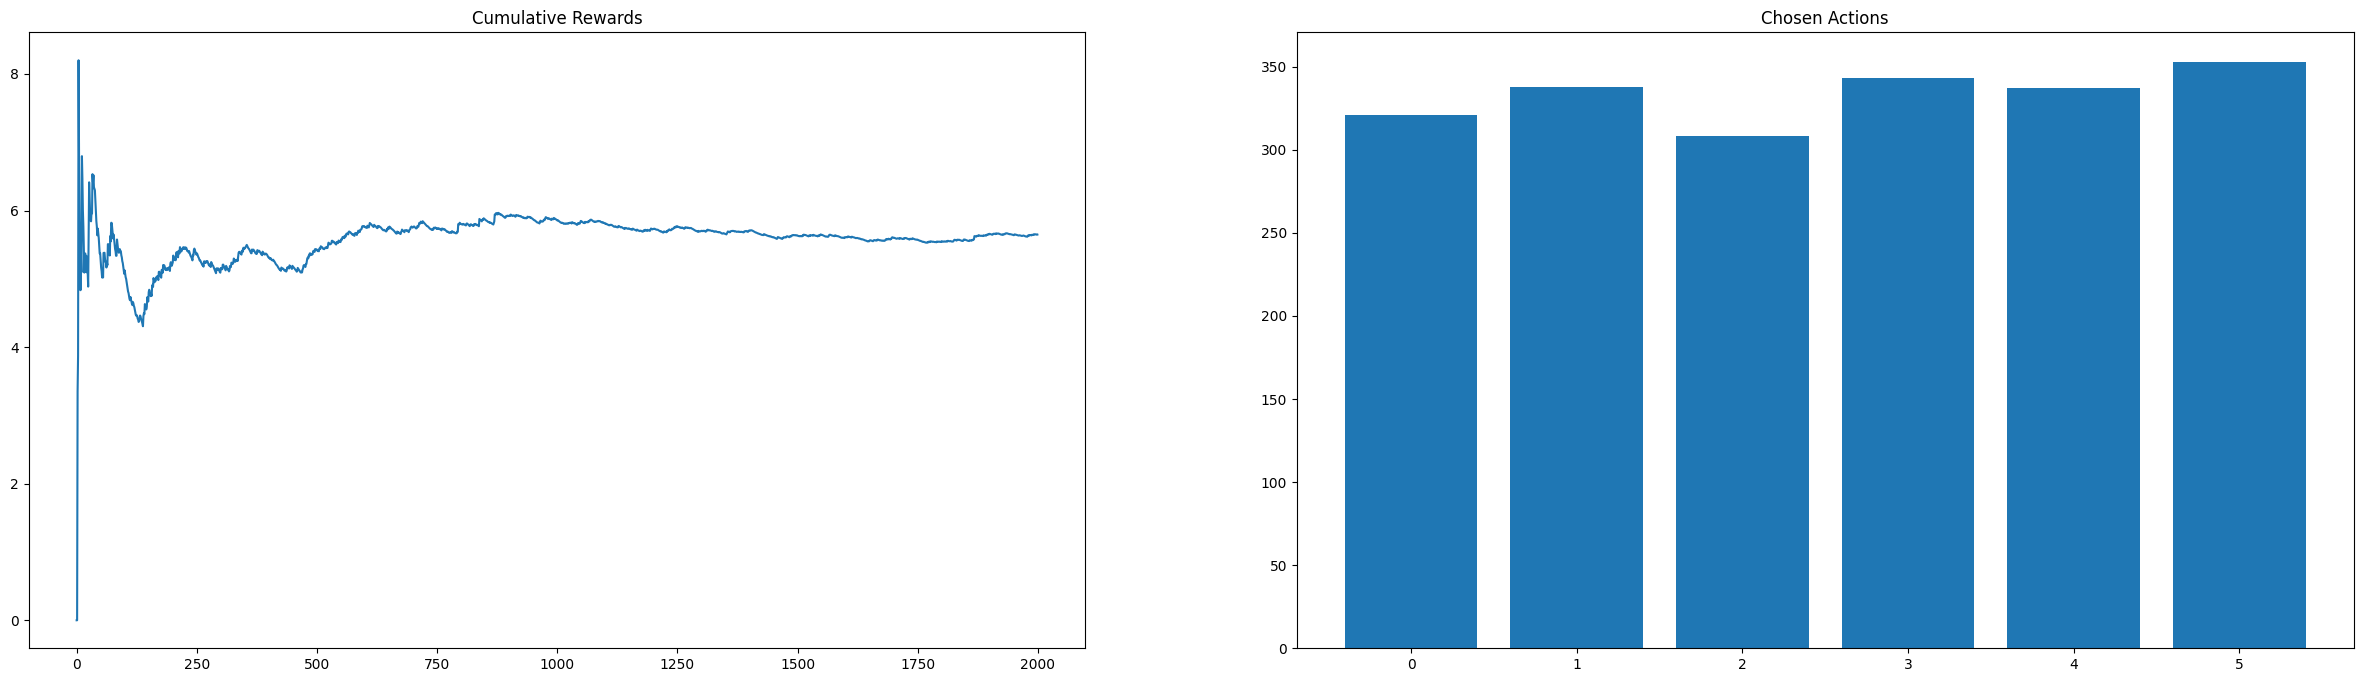

In [34]:
## plot history of agent
plot_history(ra_history)

Summary
* We can see the agent chose each arm randomly about the same number of times.
* The cumulative reward levels out after a certain number of trials.


# MAB variant 1: Epsilon Greedy Algorithm/Agent
* The epsilon-greedy algorithm is a straightforward approach that balances:  

  * exploration (randomly choosing an arm) and
  * exploitation (choosing the arm with the highest estimated reward)
* It introduces an exploration parameter, epsilon $\epsilon$, which governs the trade-off between these two aspects.



### Epsilon parameter
* With epsilon probability it "explores" random values.
* With 1 - epsilon probability it "exploits"
* A value of 0.01 is 1 out of 100 time steps it will take a "random action".
* Because we have limited time steps you need to exploit.

In [46]:
class EpsilonGreedyAgent(object):

  def __init__(self, env, max_iterations=200, epsilon=0.01,decay=0.001,decay_interval=50):
    self.env = env
    self.iterations = max_iterations
    self.epsilon = epsilon
    self.decay = decay
    self.decay_interval = decay_interval

  ## epsilon greedy method
  def act(self):
    q_values = np.zeros(self.env.k_arms)
    arm_rewards = np.zeros(self.env.k_arms)
    arm_counts = np.zeros(self.env.k_arms)

    rewards = []
    cum_rewards = []

    for i in range(1, self.iterations + 1):
      arm = np.random.choice(self.env.k_arms) if np.random.random() < self.epsilon else np.argmax(q_values)
      reward = self.env.choose_arm(arm)

      arm_rewards[arm] += reward
      arm_counts[arm] += 1
      q_values[arm] = arm_rewards[arm]/arm_counts[arm]

      rewards.append(reward)
      cum_rewards.append(sum(rewards)/ len(rewards))

      if i % self.decay_interval == 0:
        self.epsilon = self.epsilon * self.decay

    return {"arms": arm_counts, "rewards": rewards, "cum_rewards": cum_rewards}


## Epsilon Greedy Agent


In [47]:
egreedy_agent = EpsilonGreedyAgent(environment, max_iterations=2000, epsilon=0.1, decay=1)
eg_history = egreedy_agent.act()
print(f"TOTAL REWARD : {sum(eg_history['rewards']):.2f}")

TOTAL REWARD : 34562.75


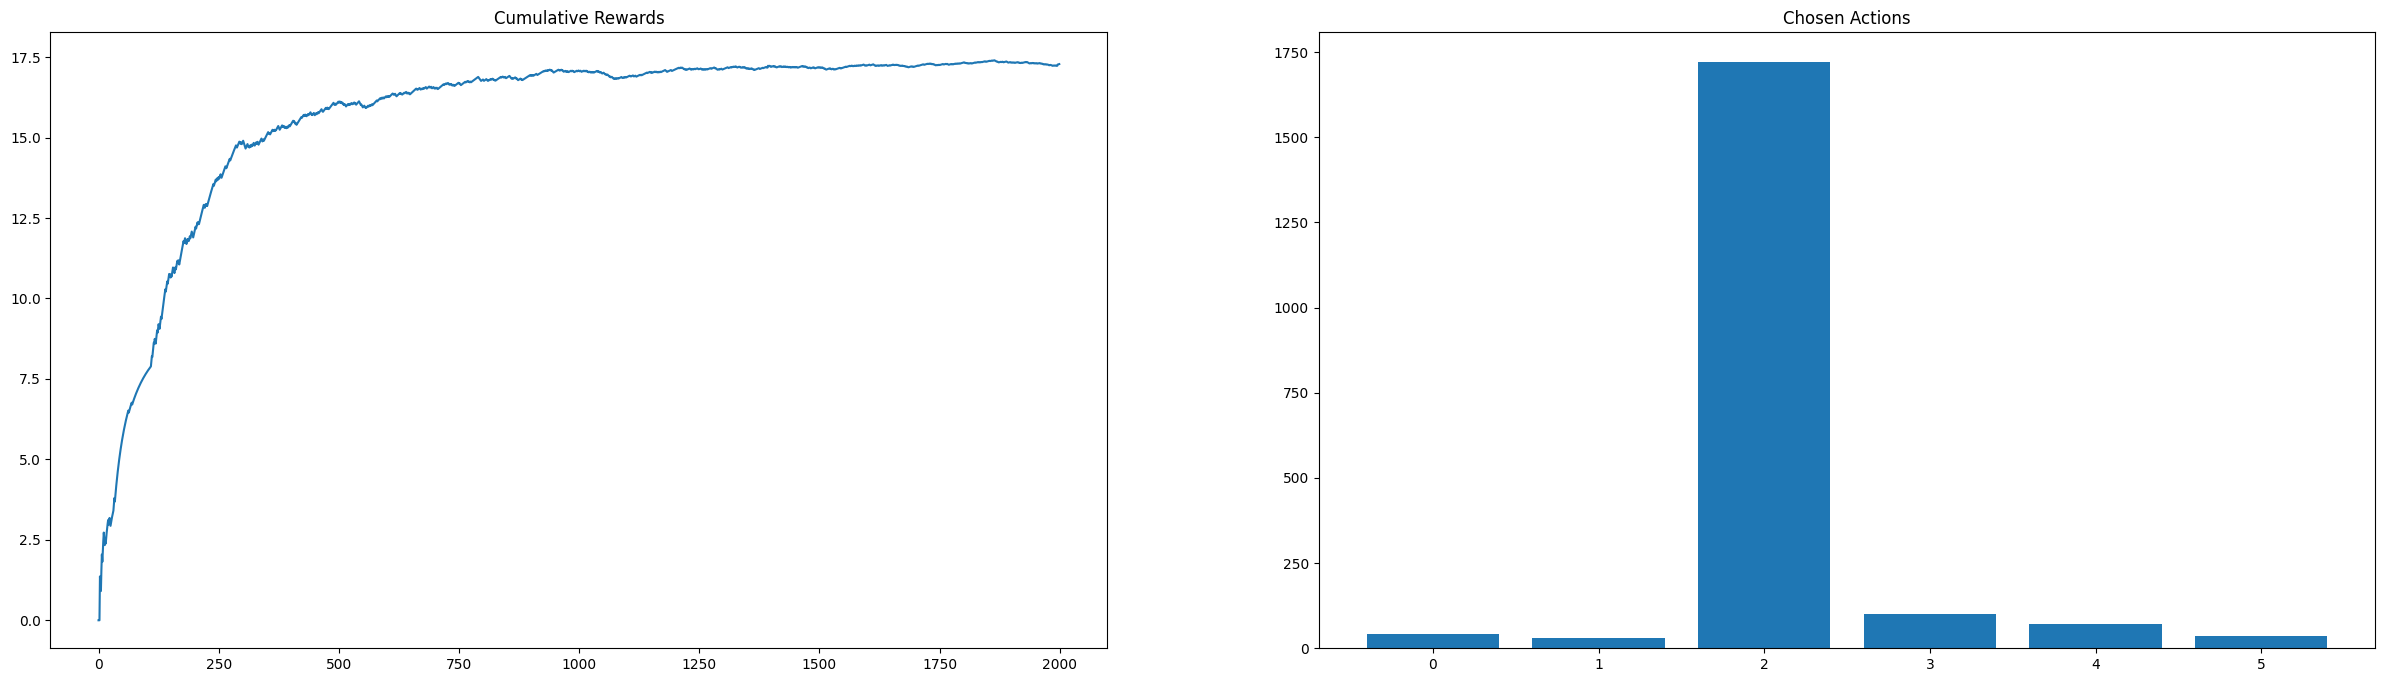

In [48]:
plot_history(eg_history)

Summary
* What is most interesting about epsilon greedy is that it will "settle" or exploit on a particular value or "arm" once it has tested all exploration/random values.
* The average "reward" settled around 17.5.
* We can see that it pulled the 2nd arm more than the other arms. Why? If we look back at the original probabilities we set:
```
Reward Probabilities		: [0.01, 1.0, 0.75, 0.99, 0.65, 1.0]
Rewards 		: [95.0, 0.0, 25.5, 10.05, 5.45, 2.5]
```
We can see the 2nd arm (remember python starts at index 0) is a value of 25.5 which has a probability of occurring 75% of the time.
  * Thus the model exploited this using the epsilon greedy because it knew it could maximize the "reward" value with more probable chance than trying to mazimize for the 95.0 value which only occurs 1 out of 100 times.
  * Or if we look at it from the perspective of the highest probability, that of 99%, while this is higher, the reward value is lower which is 10.






# MAB variant 2: Epsilon Greedy with Decay (Decreasing)
* Reduces probability of "exploring" or "randomness" over time.
* Reducing the exploration rate over time allows for more exploration in the initial stages and transitions toward greater exploitation as the algorithm gathers more information.

note:
* We are using the same class object as above but changing the parameters.
* The new params are:
  1. `decay` which should be between zero and one.
  2. `decay_interval` - after every 10 time steps we want a decay or decrease in the exploration.

In [49]:
class EpsilonGreedyAgent(object):

  def __init__(self, env, max_iterations=200, epsilon=0.01, decay=0.001, decay_interval=50):
    self.env = env
    self.iterations = max_iterations
    self.epsilon = epsilon
    self.decay = decay
    self.decay_interval = decay_interval

  ## epsilon greedy method
  def act(self):
    q_values = np.zeros(self.env.k_arms)
    arm_rewards = np.zeros(self.env.k_arms)
    arm_counts = np.zeros(self.env.k_arms)

    rewards = []
    cum_rewards = []

    for i in range(1, self.iterations + 1):
      arm = np.random.choice(self.env.k_arms) if np.random.random() < self.epsilon else np.argmax(q_values)
      reward = self.env.choose_arm(arm)

      arm_rewards[arm] += reward
      arm_counts[arm] += 1
      q_values[arm] = arm_rewards[arm]/arm_counts[arm]

      rewards.append(reward)
      cum_rewards.append(sum(rewards)/ len(rewards))

      if i % self.decay_interval == 0:
        self.epsilon = self.epsilon * self.decay

    return {"arms": arm_counts, "rewards": rewards, "cum_rewards": cum_rewards}


In [64]:
egreedy_decay_agent = EpsilonGreedyAgent(environment, max_iterations=2000, epsilon=1, decay=0.01)
egd_history = egreedy_decay_agent.act()
print(f"TOTAL REWARD : {sum(egd_history['rewards'])}")

TOTAL REWARD : 37420.8


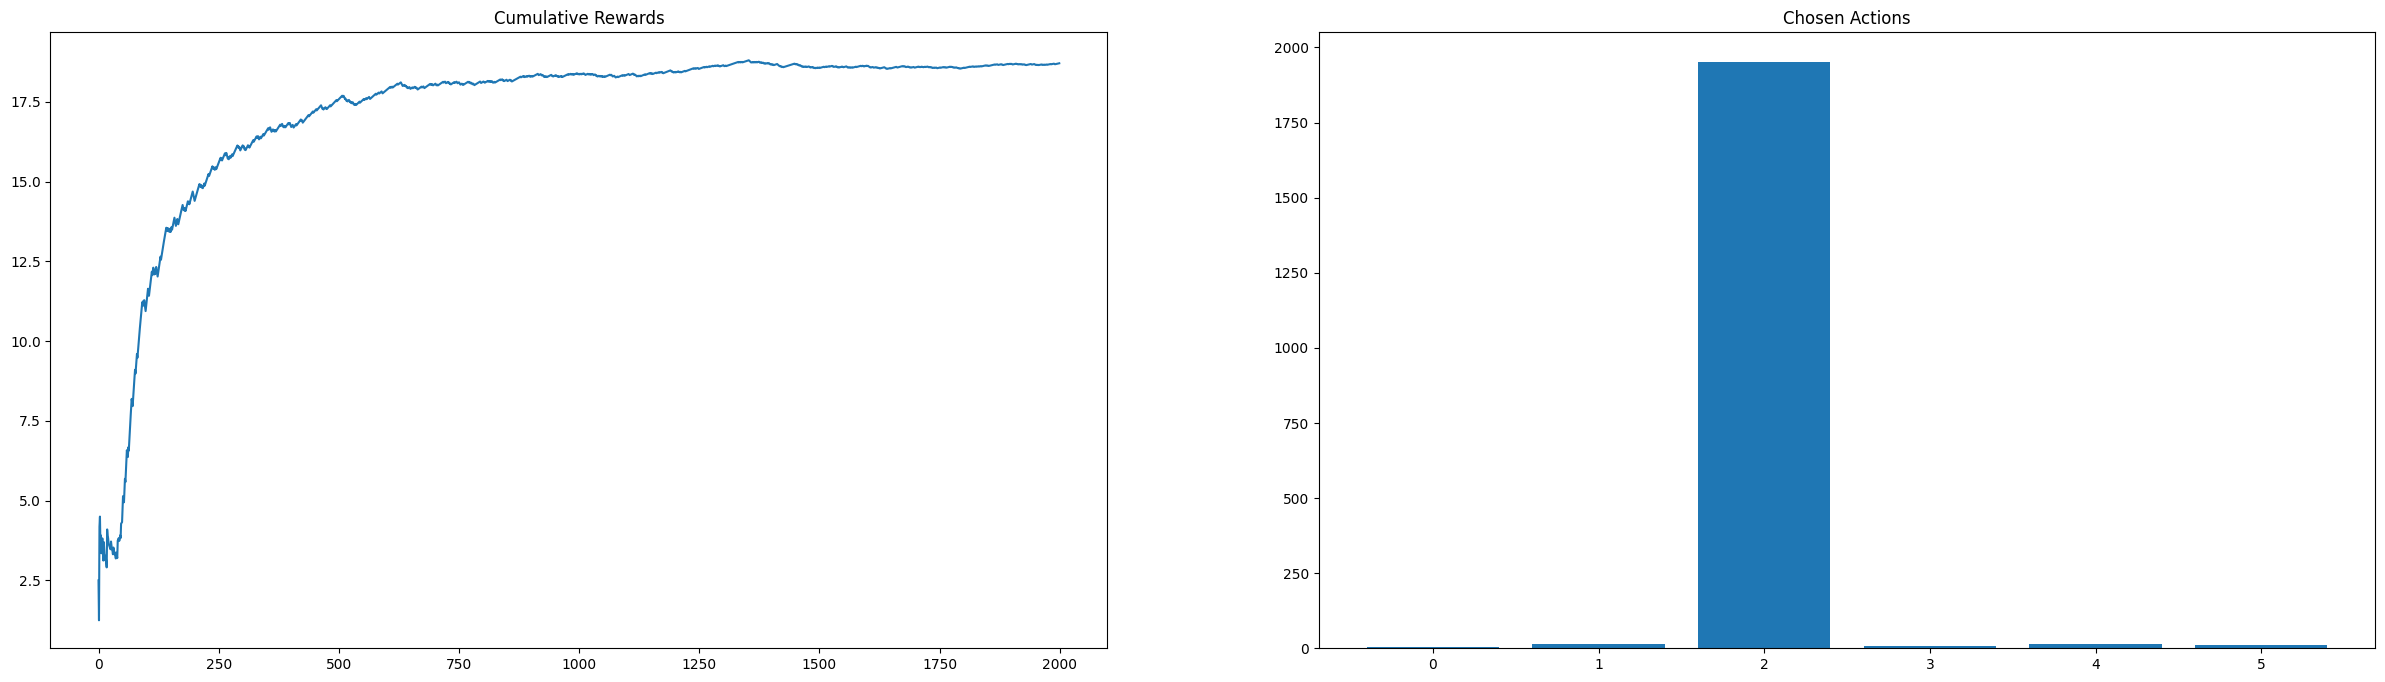

In [65]:
plot_history(egd_history)

# Appendix

## Epsilon Greedy vs. Monto Carlo Simulation
* Epsilon greedy is a strategy for selecting actions, while Monte Carlo is a learning algorithm that updates state values based on sampled episodes.

When updates occur
  * Epsilon greedy determines which action to take at each step.
  
  * Monte Carlo updates state values only at the end of an episode.

Exploration vs Exploitation

  * Epsilon greedy explicitly balances exploration (random action selection) and exploitation (choosing the best action) with the "epsilon" parameter, *
  
  * Monte Carlo relies on the policy used during simulation (like epsilon greedy) to explore the environment.

## References
1. [Exploring Multi-Armed Bandit Problem: Epsilon-Greedy, Epsilon-Decreasing, UCB, and Thompson Sampling](https://medium.com/@ym1942/exploring-multi-armed-bandit-problem-epsilon-greedy-epsilon-decreasing-ucb-and-thompson-02ad0ec272ee)